In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from matplotlib import pyplot as plt

In [13]:
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + np.random.randn(1000, 1) # to add some noise to the data
y_clean = 4 + 3 * X

In [21]:
GD_model = SGDRegressor(max_iter=1000, 
                        eta0=0.001 # Learning rate
                       )
GD_model.fit(X, y.squeeze())

SGDRegressor(eta0=0.001)

In [22]:
y_hat = GD_model.predict(X)

In [16]:
GD_model.intercept_, GD_model.coef_

(array([3.53332382]), array([3.43552885]))

In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_hat)
GD_model.n_iter_no_change
X_b = np.linspace(X.min(), X.max(), 10).reshape(-1, 1)

In [18]:
def model_ex(max_iter=0, lr=0, line_style=None):
    _model = SGDRegressor(max_iter=max_iter, eta0=lr)
    _model_fit = _model.fit(X, y)
    _y_hat = _model_fit.predict(X)
    mse = mean_squared_error(y_clean, _y_hat)
    print(f"MSE: {mse}")
    _y_hat_b = _model_fit.predict(X_b)
    line_style["label"] += f" - MSE={mse:0.4f}"
    plt.plot(X_b, _y_hat_b, **line_style)

MSE: 0.24336776075039152
MSE: 0.033618890754735904
MSE: 0.021365450201279536
MSE: 0.075721134948827
MSE: 29.000069384956813


/opt/conda/envs/py39_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/py39_ml/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/envs/py39_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/py39_ml/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_it

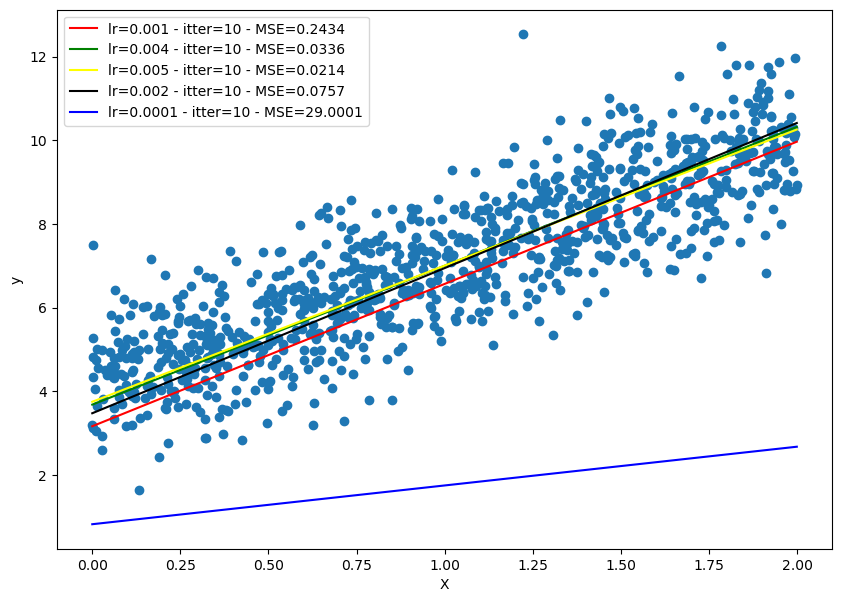

In [20]:
plt.figure(figsize=(10,7))
plt.scatter(X, y)
plt.ylabel("y")
plt.xlabel("X")
# # plt.plot(X_b, y_hat_b)
model_ex(10, 0.001, {"color":"red", "label":"lr=0.001 - itter=10"})
model_ex(10, 0.004, {"color":"green", "label":"lr=0.004 - itter=10"})
model_ex(10, 0.005, {"color":"yellow", "label":"lr=0.005 - itter=10"})
model_ex(10, 0.002, {"color":"black", "label":"lr=0.002 - itter=10"})
model_ex(10, 0.0001, {"color":"blue", "label":"lr=0.0001 - itter=10"})
plt.legend()